In [114]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [115]:
def generate_binary_list(N, fixed_length=None):
    a_test = range(2**N)
    binary_list = []
    # Determine the fixed length if not provided
    if fixed_length is None:
        fixed_length = len(bin(max(a_test))) - 2
    for num in a_test:
        binary_representation = bin(num)[2:]  # Convert to binary and remove the '0b' prefix
        binary_digits = [int(digit) for digit in binary_representation]
        while len(binary_digits) < fixed_length:
            binary_digits.insert(0, 0)
        binary_digits.reverse()
        binary_list.append(binary_digits)

    return a_test, binary_list

a_test, a_bin = generate_binary_list(3)

print("a_test:", list(a_test))
print("a_bin:", a_bin)

a_test: [0, 1, 2, 3, 4, 5, 6, 7]
a_bin: [[0, 0, 0], [1, 0, 0], [0, 1, 0], [1, 1, 0], [0, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 1]]


In [124]:
def flip(a, i, j):
    f = 2**i + 2**j
    return a^f

def generate_Hamiltonian(N):
    a, a_binary = generate_binary_list(N)
    a = list(a)
    H = np.zeros((2**N, 2**N))
    for a_bin, a_int in zip(a_binary, a):
        for i in range(N):
            j = (i+1)%N
            if a_bin[i] == a_bin[j]:
                H[a_int,a_int] += 1/4
            else:
                H[a_int,a_int] -= 1/4
                b = flip(a_int, i, j)
                H[a_int, b] = 1/2
    return H

H_2 = generate_Hamiltonian(2)
print(H_2)

[[ 0.5  0.   0.   0. ]
 [ 0.  -0.5  0.5  0. ]
 [ 0.   0.5 -0.5  0. ]
 [ 0.   0.   0.   0.5]]


In [117]:
eigs_2 = np.linalg.eig(H_2)
eigs_2.eigenvalues

array([-0.75,  0.75, -0.75,  0.75, -0.75, -0.75,  0.75,  0.75])

In [118]:
eigs_2.eigenvectors

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.69128584,  0.56195149,  0.12677556,
         0.26953578,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.34564292,  0.56195149,  0.4209427 ,
         0.16691735,  0.        ,  0.        ],
       [ 0.40824829,  0.57735027, -0.21725018,  0.13245324,  0.52209556,
        -0.66174511,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.34564292,  0.56195149, -0.54771826,
        -0.43645313,  0.        ,  0.        ],
       [ 0.40824829,  0.57735027, -0.21725018,  0.13245324, -0.48225385,
         0.49233127,  0.        ,  0.        ],
       [-0.81649658,  0.57735027,  0.43450036,  0.13245324, -0.03984172,
         0.16941385,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ]])

In [119]:
eigenvalues = []
eigenvectors = []
list_N = np.arange(2,6)

for n in list_N:
    H_n = generate_Hamiltonian(n)
    eigs = np.linalg.eig(H_n)
    eigvals = eigs.eigenvalues
    eigvecs = eigs.eigenvectors
    eigenvalues.append(eigvals)
    eigenvectors.append(eigvecs)

[np.min(e) for e in eigenvalues]

[-0.9999999999999999, -0.75, -1.9999999999999987, -1.8680339887499]

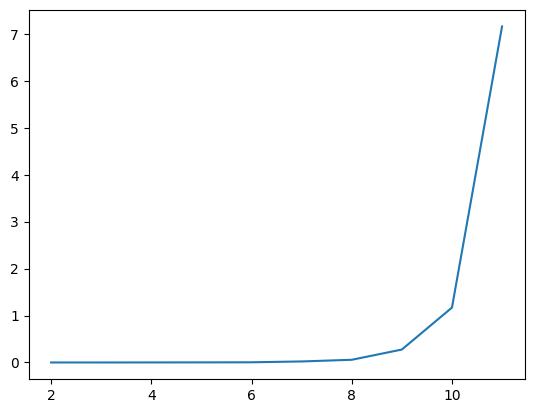

In [120]:
computing_times = []
list_N = np.arange(2,12)

for n in list_N:
    start = time.time()
    H_n = generate_Hamiltonian(n)
    eigs = np.linalg.eig(H_n)
    stop = time.time()
    diff_time = stop - start
    computing_times.append(diff_time)

plt.plot(list_N, computing_times)

In [121]:
computing_times

[0.0,
 0.0,
 0.0009984970092773438,
 0.0019989013671875,
 0.003985166549682617,
 0.021938800811767578,
 0.057468414306640625,
 0.275435209274292,
 1.1688838005065918,
 7.157394886016846]

Part c)

In [122]:
testsequence = [1, 0, 0, 0, 1, 0, 1]
k_B = 1.38 *10**(-23)

def energy(seq_bin, J=1):
    e = np.sum([seq_bin[i]*seq_bin[i+1] for i in range(len(seq_bin)-1)]) 
    e += seq_bin[0]*seq_bin[-1]
    return -J*e

#according to the definition from assignment 2
def specific_heat(arr_bin, T, J=1):
    energies = []
    for s in arr_bin:
        e_s = energy(s, J)
        energies.append(e_s)
    mean_energy = np.mean(energies)
    mean_square_energy = np.mean([e_i**2 for e_i in energies])
    k_b = 1.38 *10**(-23)
    return (mean_square_energy - mean_energy**2)/k_b*T**2

def magnetic_susceptibility(arr_bin, T):
    list_spins = []
    for seq in arr_bin:
        l_s = []
        for s_i in seq:
            if s_i == 0:
                l_s.append(-1)
            if s_i == 1:
                l_s.append(1)
        list_spins.append(l_s)
    k_b = 1.38 *10**(-23)
    n = arr_bin.shape[1] #Todo: is true?
    list_m = np.sum(list_spins, axis=0)
    m_mean = np.mean(list_m)
    m_2_mean = np.mean([m**2 for m in list_m])
    return (n/k_b*T)*(m_2_mean-m_mean**2)

def C_v(N, T, J=1):
    frac = J/(k_B*T)
    enum = frac**2
    denom = np.cosh(frac)**2
    return N*k_B*enum/denom


In [123]:
sp = specific_heat()

TypeError: specific_heat() missing 2 required positional arguments: 'arr_bin' and 'T'

In [ ]:
list_T = np.linspace(0.1,10,100)

plt.plot(list_T, C_v(100, list_T))

In [ ]:
# Problem 3

